In [130]:
from Training import DataCreateUpdated as dc
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import random

# rec_paths = ["OpenBCI-RAW-2021-12-02_19-19-53.txt", 
#                 "OpenBCI-RAW-2021-12-02_19-31-12.txt", 
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_JawClench_2\OpenBCI-RAW-2022-02-16_19-30-28.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_1\OpenBCI-RAW-2022-02-16_19-33-20.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_LeftBlink_2\OpenBCI-RAW-2022-02-16_19-39-23.txt",
#                 "Recordings\Spring_2022\OpenBCISession_2022-02-16_Evan_RightBlink_1\OpenBCI-RAW-2022-02-16_19-42-03.txt"]
# label_paths = ["JawClench_labels_Ansh_12-02-21-1918.txt", 
#                 "JawClench_labels_Ansh_12-02-21-1930.txt", 
#                 "Recordings\Spring_2022\Evan_JawClench_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_1.txt",
#                 "Recordings\Spring_2022\Evan_LeftBlink_2.txt",
#                 "Recordings\Spring_2022\Evan_RightBlink_1.txt"]
# label_types = ["JAW_CLENCH", 
#                 "JAW_CLENCH", 
#                 "JAW_CLENCH",
#                 "L_EYE",
#                 "L_EYE",
#                 "R_EYE"]


rec_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\OpenBCI-RAW-2022-03-23_20-43-17.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\OpenBCI-RAW-2022-03-23_20-41-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\OpenBCI-RAW-2022-03-23_20-37-06.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\OpenBCI-RAW-2022-03-23_20-39-04.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\OpenBCI-RAW-2022-03-23_20-33-09.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\OpenBCI-RAW-2022-03-23_20-34-58.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\OpenBCI-RAW-2022-03-23_20-21-37.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\OpenBCI-RAW-2022-03-23_20-25-30.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\OpenBCI-RAW-2022-03-23_20-27-22.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\OpenBCI-RAW-2022-03-23_20-29-16.txt"]

label_paths = ["Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowLower_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_BrowRaise_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_JawClench_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_LeftEye_2\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_1\labels.txt",
            "Recordings\Spring_2022\OpenBCISession_2022-03-23_Sam_RightEye_2\labels.txt"]

label_types = ["BROW_DOWN", "BROW_DOWN", "BROW_UP", "BROW_UP", "JAW_CLENCH", "JAW_CLENCH", "L_EYE", "L_EYE", "R_EYE", "R_EYE"]

#Chooses which input data to use
inputsToUse = np.arange(len(rec_paths))

In [131]:
# Data visualization for the sample data at index sdi
# Go to next block for actual code
def visualize_data(sdi):
    sample_obs = dc.getObservations(rec_paths[sdi], label_paths[sdi], 1000, [0,1,2,3], label_types[sdi])

    sample_y_channels_groups, sample_ind_groups, sample_t_groups, sample_l_groups = sample_obs
    
    na_ind = 0 #non-action
    a_ind = 0 #action

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.xlabel('mean_abs_dev')
    plt.ylabel('channel')

    colorgood = 'blue'
    colorbad = 'red'
    pos = -1
    for channel_groups in sample_y_channels_groups:
        pos = (pos+1)%4
        for i in range(channel_groups.shape[0]):
            if(sample_l_groups[i][0] == 1):
                color = colorbad
                if(random.randint(0, 2*na_ind) < 1):
                    na_ind = i
            else:
                color = colorgood
                if(random.randint(0, 2*a_ind) < 1):
                    a_ind = i
            plt.plot(np.mean(np.abs(channel_groups[i] - np.ones_like(channel_groups[i]) * np.mean(channel_groups[i]))), pos, 'x', color = color)
    
    plt.subplot(1,3,2)
    plt.xlabel('index - Action: ' + str(a_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[a_ind], channel_groups[a_ind])


    plt.subplot(1,3,3)
    plt.xlabel('index - No Action: ' + str(na_ind))
    plt.ylabel('voltage')
    plt.ylim(0, 2500)
    for channel_groups in sample_y_channels_groups:
        plt.plot(sample_ind_groups[na_ind], channel_groups[na_ind])

In [132]:
# for input in inputsToUse:
#     visualize_data(input)

In [133]:
def getMeanAbsDeviation(dchannel):
    return np.transpose(np.mean(np.abs(dchannel - np.mean(dchannel, axis=2, keepdims=True)), axis=2))

def getMeanSquaredDeviation(dchannel):
    return np.transpose(np.mean(np.square(dchannel - np.mean(dchannel, axis=2, keepdims=True)), axis=2))

def getMean(dchannel):
    return np.transpose(np.mean(dchannel, axis=2))

def getPercentile(dchannel, percent):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile10(dchannel, percent=10):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile90(dchannel, percent=90):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile15(dchannel, percent=15):
    return np.transpose(np.percentile(dchannel, percent, axis=2))

def getPercentile85(dchannel, percent=85):
    return np.transpose(np.percentile(dchannel, percent, axis=2))


def getSpread(dchannel):
    return np.transpose(np.max(dchannel, axis=2) - np.min(dchannel, axis=2))

def getSpreadPercentile(dchannel, low=5, high=95):
    return getPercentile(dchannel, high) - getPercentile(dchannel, low)

def getPeakCount(dchannel, w=4):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

def getPeakCount10(dchannel, w=10):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

def getPeakCount1(dchannel, w=1):
    ret = np.zeros((dchannel.shape[1], dchannel.shape[0]))
    for ch in range(dchannel.shape[0]):
        for sample in range(dchannel.shape[1]):
            count = 0
            for tind in range(w, dchannel.shape[2]-w):
                isPeak = True
                for x in range(1, w+1):
                    isPeak &= (dchannel[ch, sample, tind] > dchannel[ch, sample, tind-x] and dchannel[ch, sample, tind] > dchannel[ch, sample, tind+x])
                if(isPeak):
                    count+=1
            ret[sample, ch] = count
    return ret

In [134]:
# # Loads in X and Y
# XMean = None
# XMeanDev = None
# X90 = None
# X10 = None
# Peaks = None
# Spread = None
# y = None
# for i in inputsToUse:
#     obs = dc.getObservations(rec_paths[i], label_paths[i], 1000, [0,1,2,3], label_types[i])
#     y_channels_groups, ind_groups, t_groups, l_groups = obs
#     # Remove first and last 5 if needed
#     # y_channels_groups = y_channels_groups[:, 5:-5, :]
#     # l_groups = l_groups[5:-5, :]
#     if XMean is not None:
#         XMean = np.concatenate((XMean, getMean(y_channels_groups)))
#         XMeanDev = np.concatenate((XMeanDev, getMeanAbsDeviation(y_channels_groups)))
#         X90 = np.concatenate((X90, getPercentile(y_channels_groups, 90)))
#         X10 = np.concatenate((X10, getPercentile(y_channels_groups, 10)))
#         Spread = np.concatenate((Spread, getSpreadPercentile(y_channels_groups, 10, 90)))
#         Peaks = np.concatenate((Peaks, getPeakCount(y_channels_groups, 5)))
#         y = np.concatenate((y, l_groups))
#     else:
#         XMean = getMean(y_channels_groups)
#         XMeanDev = getMeanAbsDeviation(y_channels_groups)
#         X90 = getPercentile(y_channels_groups, 90)
#         X10 = getPercentile(y_channels_groups, 10)
#         Spread = getSpreadPercentile(y_channels_groups, 10, 90)
#         Peaks = getPeakCount(y_channels_groups, 5)
#         y = l_groups

# X = None
# # featureList = [XMean, XMeanDev]
# featureList = [XMean, XMeanDev, X10, X90]
# for feature in featureList:
#     if(X is None):
#         mean = np.mean(feature, axis=0)
#         stdev = np.std(feature, axis=0)
#         X = (feature - mean)/stdev
#     else:
#         mean = np.mean(feature, axis=0)
#         stdev = np.std(feature, axis=0)
#         X = np.concatenate((X, (feature - mean)/stdev), axis=1)


In [135]:
# Loads in X and Y
functsList = [getMean, getMeanSquaredDeviation, getMeanAbsDeviation, getSpreadPercentile, getPeakCount, getPeakCount10, getPeakCount1]
meanScale = []
stdevScale = []
functsDict = {}
for featureFunc in functsList:
    y = None
    fX = None
    for i in inputsToUse:
        obs = dc.getObservations(rec_paths[i], label_paths[i], 1000, [0,1,2,3], label_types[i])
        y_channels_groups, ind_groups, t_groups, l_groups = obs
        if fX is not None:
            fX = np.concatenate((fX, featureFunc(y_channels_groups)))
            y = np.concatenate((y, l_groups))
        else:
            fX = featureFunc(y_channels_groups)
            y = l_groups
    mean = np.mean(fX, axis=0)
    stdev = np.std(fX, axis=0)
    meanScale.append(mean)
    stdevScale.append(stdev)
    functsDict[featureFunc] = (fX - mean)/stdev


In [136]:
def createX(fDict, count):
    X = None
    # featureList = [functsDict[getMean], functsDict[getMeanAbsDeviation]]
    ftotal = []
    fnames = []
    for f in fDict.values():
        ftotal.append(f)
    for f in fDict.keys():
        fnames.append(f)
    fIndices = random.sample(range(len(ftotal)), count)
    featureList = [ftotal[i] for i in fIndices]
    fnames = [fnames[i] for i in fIndices]
    for feature in featureList:
        if(X is None):
            X = feature
        else:
            X = np.concatenate((X, feature), axis=1)
    return X, fnames

In [137]:
#test-train split

X, find = createX(functsDict, 3)

X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)
    

In [138]:
from imblearn.over_sampling import SMOTE

def oversample(X, y):
    X_combined = np.concatenate((X, y), axis=1)
    over_sampler = SMOTE(random_state=4)
    X_combined, _ = over_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
    X_res = X_combined[:, 0:X.shape[1]]
    y_res = X_combined[:, X.shape[1]:X_combined.shape[1]]
    return X_res, y_res

# Over Sampling
X_res, y_res = oversample(X_res, y_res)
X_test, y_test = oversample(X_test, y_test)


# Under Sampling
# from imblearn.under_sampling import RandomUnderSampler
# under_sampler = RandomUnderSampler(sampling_strategy = 'majority', random_state=42, replacement = True)
# print(X.shape, y.shape)
# X_res, y_res = under_sampler.fit_resample(X_combined, np.argmax(y, axis=1))
# print(X_res.shape, y_res.shape)
# X = X_res[:, 0:X.shape[1]]
# y = X_res[:, X.shape[1]:X_res.shape[1]]

In [139]:
def getMetrics(K, X_res, y_res, X_eval, y_eval, verbose=True):
    knn_classifier = KNeighborsClassifier(K)
    knn_classifier.fit(X_res, np.argmax(y_res, axis=1))

    predictions = knn_classifier.predict(X_eval)
    recall = sklearn.metrics.recall_score(np.argmax(y_eval, axis=1), predictions, average=None)
    precision = sklearn.metrics.precision_score(np.argmax(y_eval, axis=1), predictions, average=None)
    accuracy = sklearn.metrics.accuracy_score(np.argmax(y_eval, axis=1), predictions)
    if(verbose):
        print("Results (KNN): ")
        print("Recall: \t", recall)
        print("Precision: \t", precision)
        print("Accuracy:\t", accuracy)
        sklearn.metrics.ConfusionMatrixDisplay.from_predictions(np.argmax(y_eval, axis=1), predictions)
    else:
        return recall, precision, accuracy, knn_classifier

In [ ]:
bestacc = 0
bestfind = None
params = None
r, p, a = None, None, None
bestX = None

(16, 0.7742616033755274)
(7, 0.7774261603375527)
Best Accuracy:  0.7774261603375527
Functions:  [<function getMean at 0x000001C2C15A28B0>]
Hyperparams:  (7, 0.7774261603375527)
Recall:  [0.28481013 0.85443038 0.85443038 0.9556962  0.76582278 0.94936709]
Precision:  [0.83333333 0.67839196 0.84375    0.82065217 0.72891566 0.81081081]
Results (KNN): 
Recall: 	 [0.28481013 0.85443038 0.85443038 0.9556962  0.76582278 0.94936709]
Precision: 	 [0.83333333 0.67839196 0.84375    0.82065217 0.72891566 0.81081081]
Accuracy:	 0.7774261603375527


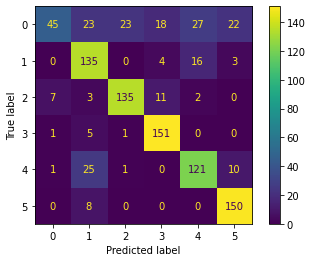

In [144]:

for cc in range(25):
    rand = np.random.randint(1, len(functsList)+1)
    X, find = createX(functsDict, rand)
    X_res, X_test, y_res, y_test = train_test_split(X, y, test_size=0.4, random_state = 4)
    X_res, y_res = oversample(X_res, y_res)
    X_test, y_test = oversample(X_test, y_test)
    accuarr = []
    for i in range(1, 30):
        rec, pre, acc, _ = getMetrics(i, X_res, y_res, X_test, y_test, verbose=False)
        accuarr.append(acc)

    if(np.max(accuarr) > bestacc):
        bestacc = np.max(accuarr)
        bestX = X
        bestFind = find
        params = (np.argmax(accuarr)+1, np.max(accuarr))
        print(params)
        # getMetrics(np.argmax(accuarr)+1, X_test, y_test)
        r, p, a, best = getMetrics(np.argmax(accuarr)+1, X_res, y_res, X_test, y_test, verbose=False)

print("Best Accuracy: ", bestacc)
print("Functions: ", find)
print("Hyperparams: ", params)
print("Recall: ", r)
print("Precision: ", p)
X_res, X_test, y_res, y_test = train_test_split(bestX, y, test_size=0.4, random_state = 4)
X_res, y_res = oversample(X_res, y_res)
X_test, y_test = oversample(X_test, y_test)
getMetrics(params[0], X_res, y_res, X_test, y_test)


In [141]:
from joblib import dump, load
dump(best, 'filename.joblib') 
print(meanScale[0], meanScale[1])
print(stdevScale[0], stdevScale[1])

[1347.35037563  432.18141293 1529.14004044 1162.73036954] [151255.24583745  10010.8502385   14303.17822136 114044.85605434]
[867.01251438 184.15656501 242.28294318 527.62001911] [ 944672.81300809   33562.11981016   44621.97271766 1029872.23436399]


In [142]:
print("Best Accuracy: ", bestacc)
print("Functions: ", find)
print("Hyperparams: ", params)
print("Recall: ", r)
print("Precision: ", p)
getMetrics(params[0], X_test, y_test)

Best Accuracy:  0.7774261603375527
Functions:  [<function getPeakCount at 0x000001C2C112CA60>, <function getMeanAbsDeviation at 0x000001C2BED33820>, <function getSpreadPercentile at 0x000001C2C142C5E0>, <function getPeakCount10 at 0x000001C2C112C940>, <function getMean at 0x000001C2C15A28B0>]
Hyperparams:  (7, 0.7774261603375527)
Recall:  [0.28481013 0.85443038 0.85443038 0.9556962  0.76582278 0.94936709]
Precision:  [0.83333333 0.67839196 0.84375    0.82065217 0.72891566 0.81081081]


TypeError: getMetrics() missing 2 required positional arguments: 'X_eval' and 'y_eval'

In [ ]:
print(find)

[<function getSpreadPercentile at 0x000001C2BEA5D8B0>, <function getPeakCount at 0x000001C2C1D39D30>, <function getMeanAbsDeviation at 0x000001C2FBE5C430>]
